# Seasonality

References:
- median and standard error https://influentialpoints.com/Training/standard_error_of_median.htm

In [1]:
import os
import pickle

import pandas as pd
import numpy as np
import xarray as xr
import scipy
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
REPO_ROOT = '/Users/rwegener/repos/chesapeake_mhw/'
SAVE_FIGS = True

In [3]:
path = os.path.join(REPO_ROOT, 'data/interim', 'mhw_eventstats_dict.pickle')
with open(path, 'rb') as handle:
    event_statistics = pickle.load(handle)

### Looking at event stats from ejo

In [4]:
events_df = pd.DataFrame(one_pixel)

NameError: name 'one_pixel' is not defined

In [ ]:
one_pixel = event_statistics[25, 25]

In [ ]:
events_df

## New Analysis: Seasonality of MHW

In [4]:
def get_season(row):
    season = None
    if row.date_start.month in [6, 7, 8]:
        # season = 'JJA'
        season = 2
    elif row.date_start.month in [9, 10, 11]:
        # season = 'SON'
        season = 3
    elif row.date_start.month in [12, 1, 2]:
        # season = 'DJF'
        season = 4
    elif row.date_start.month in [3, 4, 5]:
        # season = 'MAM'
        season = 1
    else:
        season = np.nan
    return season

In [5]:
# Count of mhw grouped by month
months = []
for i in range(event_statistics.shape[0]):
    for j in range(event_statistics.shape[1]):
        df = pd.DataFrame(event_statistics[i, j])
        df.date_start = pd.to_datetime(df.date_start)
        if not df.empty:
            df['month'] = df.date_start.dt.month
            # This line isn't necessary if we just add a groupby('month').count()
            # at the end of a collective full_df
            months = months + df.date_start.dt.month.tolist()

months_np = np.array(months)

Text(0.5, 0, 'month')

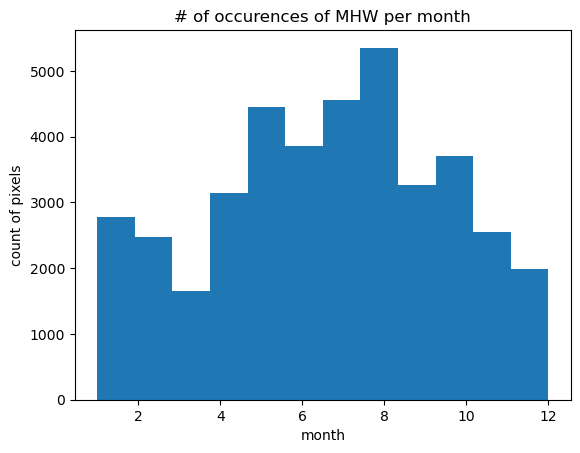

In [6]:
plt.hist(months_np, bins=12)
plt.title('# of occurences of MHW per month')
plt.ylabel('count of pixels')
plt.xlabel('month')

BELOW: this doesn't work (to naively try to transfer). To figure something like this out we'll need to keep track of the months and then do an average at the end

In [7]:
# Count of mhw grouped by month
months = []
full_df = pd.DataFrame()
for i in range(event_statistics.shape[0]):
    for j in range(event_statistics.shape[1]):
        df = pd.DataFrame(event_statistics[i, j])
        df.date_start = pd.to_datetime(df.date_start)
        if not df.empty:
            df['month'] = df.date_start.dt.month
            # months = months + df.date_start.dt.month.tolist()
            full_df = pd.concat([full_df, df])

# months_np = np.array(months)

In [8]:
full_df[full_df.time_start == 731725]

,time_start,time_end,time_peak,date_start,date_end,date_peak,index_start,index_end,index_peak,duration,...,intensity_cumulative_relThresh,intensity_max_abs,intensity_mean_abs,intensity_var_abs,intensity_cumulative_abs,category,rate_onset,rate_decline,n_events,month
1,731725,731729,731728,2004-05-24,2004-05-28,2004-05-27,631,635,634,5,...,3.328698,22.829987,22.351995,0.432456,111.759979,Moderate,0.252345,0.662094,41,5
1,731725,731729,731728,2004-05-24,2004-05-28,2004-05-27,631,635,634,5,...,3.256443,22.739990,22.253998,0.434671,111.269989,Moderate,0.248087,0.706907,40,5
1,731725,731729,731728,2004-05-24,2004-05-28,2004-05-27,631,635,634,5,...,3.178833,22.639984,22.139990,0.443304,110.699951,Moderate,0.244423,0.759286,40,5
1,731725,731729,731728,2004-05-24,2004-05-28,2004-05-27,631,635,634,5,...,3.253701,22.579987,22.041998,0.454674,110.209991,Moderate,0.250213,0.838952,42,5
1,731725,731729,731728,2004-05-24,2004-05-28,2004-05-27,631,635,634,5,...,3.754356,22.970001,22.403997,0.470297,112.019989,Moderate,0.296643,0.728911,42,5
1,731725,731729,731728,2004-05-24,2004-05-28,2004-05-27,631,635,634,5,...,3.624369,22.829987,22.276001,0.462837,111.380005,Moderate,0.283585,0.773907,41,5
1,731725,731729,731728,2004-05-24,2004-05-28,2004-05-27,631,635,634,5,...,3.425980,22.670013,22.118000,0.463870,110.589996,Moderate,0.269527,0.836720,43,5
1,731725,731730,731728,2004-05-24,2004-05-29,2004-05-27,631,636,634,6,...,4.054843,23.670013,23.039999,0.430894,138.239990,Moderate,0.312621,0.548114,44,5
1,731725,731730,731728,2004-05-24,2004-05-29,2004-05-27,631,636,634,6,...,4.285353,23.600006,22.926666,0.440856,137.559998,Moderate,0.328454,0.599806,45,5
1,731725,731730,731728,2004-05-24,2004-05-29,2004-05-27,631,636,634,6,...,4.263695,23.429993,22.730001,0.462166,136.380005,Moderate,0.336848,0.661854,42,5


These are cool -- my concern is that we aren't really seeing averages over different events, but that the spatially largest MHW are dominating the 

In [9]:
occurences = full_df.groupby(full_df.month)['date_start'].count()

To give occurences error bars we may need to switch to doing average # of pixels each month, instead of purely taking a sum of all the MHW pixels that ever happened in each month.

Notes: doing it this new way really dramatically changed the graph. In the early part of the year it's basically the opposite pattern from what was previously shown.

In [10]:
monthly_counts = full_df.groupby([full_df.month, full_df.date_start.dt.year])['date_start'].count()

In [11]:
years = list(range(1, 13)) * 21
new_multiindex = []
for month in range (1, 13):
    for year in range(2002, 2023):
        new_multiindex.append((month, year))

In [12]:
new_index = pd.MultiIndex.from_tuples(new_multiindex, names = ['month', 'year'])
monthly_counts = monthly_counts.reindex(new_index, fill_value=None)

In [64]:
monthly_counts

month  year
1      2002      NaN
       2003      1.0
       2004     10.0
       2005     14.0
       2006     13.0
               ...  
12     2018      NaN
       2019      NaN
       2020     54.0
       2021    320.0
       2022      5.0
Name: date_start, Length: 252, dtype: float64

### Is the distribution of observations normal?

If it is we should just use mean for all these. If it isn't it's worth continuing to find the best way to estimate standard error of the median.

In [81]:
full_df.month

0     10
1      5
2      8
3      9
4      1
      ..
36    11
37     2
38     2
39     4
40     9
Name: month, Length: 39767, dtype: int64

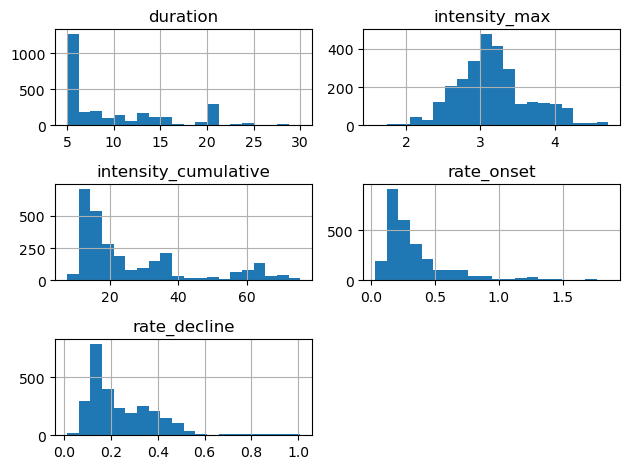

In [93]:
full_df.query('month == 1')[['duration', 'intensity_max', 'intensity_cumulative', 'rate_onset', 'rate_decline']].hist(bins=20)
plt.tight_layout()

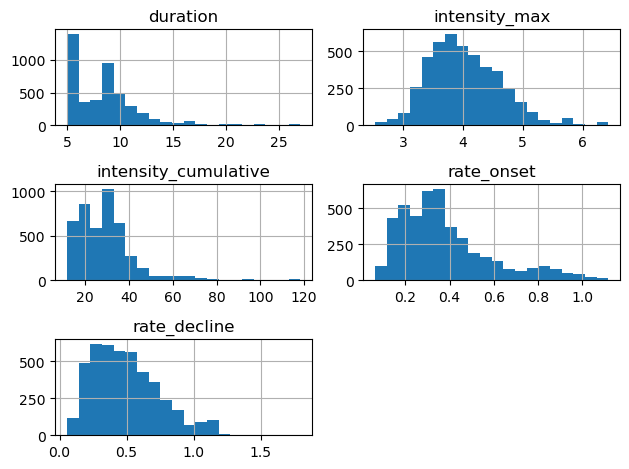

In [94]:
full_df.query('month == 5')[['duration', 'intensity_max', 'intensity_cumulative', 'rate_onset', 'rate_decline']].hist(bins=20)
plt.tight_layout()

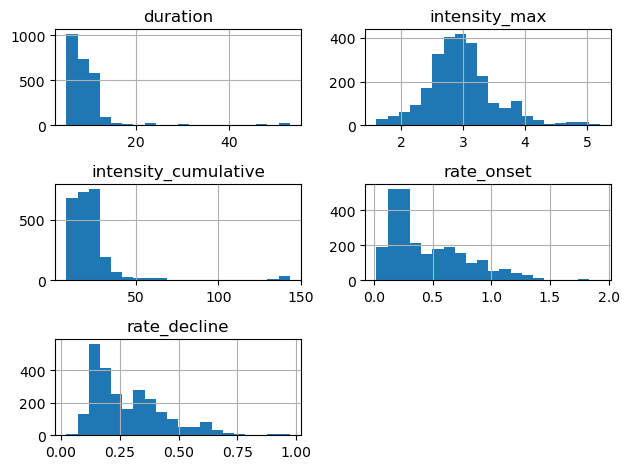

In [95]:
full_df.query('month == 11')[['duration', 'intensity_max', 'intensity_cumulative', 'rate_onset', 'rate_decline']].hist(bins=20)
plt.tight_layout()

### Back to regular analysis

In [65]:
occurences_avg = monthly_counts.groupby('month').mean()
occurences_std = monthly_counts.groupby('month').std()
occurences_st_err_mean = occurences_std.div(np.sqrt(monthly_counts.groupby('month').sum()), 
                                            axis='index')

In [68]:
occurences_st_err_mean.mean()

6.181080913246219

Averages and std for the characteristics

In [14]:
avgs = full_df.groupby(full_df.month)[['duration', 'intensity_max', 'intensity_cumulative', 'rate_onset', 'rate_decline']].median(numeric_only=True)

In [15]:
stds = full_df.groupby(full_df.month)[['duration', 'intensity_max', 'intensity_cumulative', 'rate_onset', 'rate_decline']].std(numeric_only=True)

In [97]:
stnd_err_median = stds.div(np.sqrt(monthly_counts.groupby('month').sum()), axis='index') * 1.2533

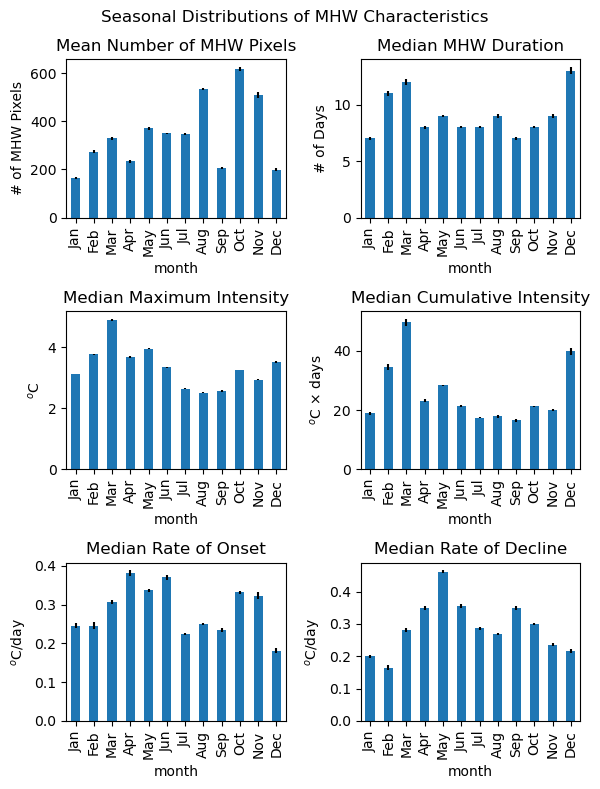

In [99]:
fig, axes = plt.subplots(3, 2)
fig.set_size_inches(6, 8)
fig.suptitle('Seasonal Distributions of MHW Characteristics')

occurences_avg.plot(ax=axes[0, 0], kind='bar', title='Mean Number of MHW Pixels')
axes[0, 0].errorbar(range(0, 12), occurences_avg.values, yerr=occurences_st_err_mean.values,
                   fmt='none', ecolor='black')
axes[0, 0].set_ylabel('# of MHW Pixels')

avgs.duration.plot(ax=axes[0, 1], kind='bar', title='Median MHW Duration')
axes[0, 1].errorbar(range(0, 12), avgs.duration.values, yerr=stnd_err_median.duration.values,
                   fmt='none', ecolor='black')
axes[0, 1].set_ylabel('# of Days')

avgs.intensity_max.plot(ax=axes[1, 0], kind='bar', title='Median Maximum Intensity')
axes[1, 0].errorbar(range(0, 12), avgs.intensity_max.values, 
                    yerr=stnd_err_median.intensity_max.values,
                   fmt='none', ecolor='black')
axes[1, 0].set_ylabel('$^o$C')

avgs.intensity_cumulative.plot(ax=axes[1, 1], kind='bar', 
                               title='Median Cumulative Intensity')
axes[1, 1].errorbar(range(0, 12), avgs.intensity_cumulative.values, 
                    yerr=stnd_err_median.intensity_cumulative.values, 
                    fmt='none', ecolor='black')
axes[1, 1].set_ylabel(r'$^o$C $\times$ days')

avgs.rate_onset.plot(ax=axes[2, 0], kind='bar', title='Median Rate of Onset')
axes[2, 0].errorbar(range(0, 12), avgs.rate_onset.values, 
                    yerr=stnd_err_median.rate_onset.values,
                   fmt='none', ecolor='black')
axes[2, 0].set_ylabel('$^o$C/day')

avgs.rate_decline.plot(ax=axes[2, 1], kind='bar', title='Median Rate of Decline')
axes[2, 1].errorbar(range(0, 12), avgs.rate_decline.values, 
                    yerr=stnd_err_median.rate_decline.values,
                   fmt='none', ecolor='black')
axes[2, 1].set_ylabel('$^o$C/day')

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 
          'Oct', 'Nov', 'Dec']
for ax in axes.flatten():
    ax.set_xticks(np.linspace(0, 11, 12))
    ax.set_xticklabels(months)

plt.tight_layout()

if SAVE_FIGS:
    plt.savefig(os.path.join(REPO_ROOT, 'figures', 'seasonality.pdf'), dpi=450, 
                bbox_inches='tight')

In [100]:
seasons = np.full(event_statistics.shape, np.nan)
# seasons = [[0]*event_statistics.shape[1]]*event_statistics.shape[0]
for i in range(event_statistics.shape[0]):
    for j in range(event_statistics.shape[1]):
        df = pd.DataFrame(event_statistics[i, j])
        df.date_start = pd.to_datetime(df.date_start)
        if not df.empty:
        # df['month'] = df.date_start.dt.month
            df['season'] = df.apply(get_season, axis=1)
            seasons[i, j] = df.season.mode().iloc[0]  # TODO just picking one
        else:
            seasons[i, j] = np.nan

Most MHW definetly happen in summer

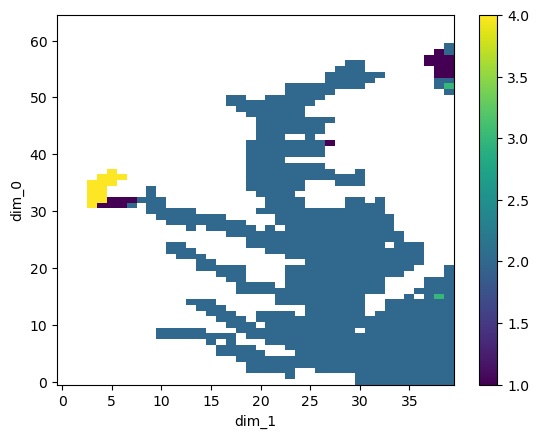

In [24]:
xr.DataArray(seasons).plot()

## Bigger and better: improved seasonality analysis

**TODO** using 16 km^2 for area for now, so it isn't an over estimate. Go back later and count more accurately.

In [25]:
# Not a good error. Worth reporting to pandas in a GH issue?
# Should just inform that index is out of range
counts.loc['2090-10-03']

NameError: name 'counts' is not defined

In [ ]:
counts = pd.DataFrame(index=pd.date_range('2002-01-01', '2023-12-31'), 
                      columns=['pixel_count'], data=0)

# Loop through each of the pixels in the AOI
for i in range(event_statistics.shape[0]):
    for j in range(event_statistics.shape[1]):
        # Loop through each MHW in that pixel
        stats_dict = event_statistics[i, j]
        # skip processing if there were no MHW in that pixel (land pixel)
        if len(stats_dict['date_start']) == 0:
               continue
        print('processing mhws')
        for mhw_idx in range(len(stats_dict['date_start'])):
            # Create a list of dates that experienced a MHW
            days = pd.date_range(
                stats_dict['date_start'][mhw_idx], stats_dict['date_end'][mhw_idx]
            )
            # Increment the counter for each of those dates
            for day in days:
                counts.loc[day] += 1

In [ ]:
counts.plot(logy=True, legend=False, figsize=(10, 3))

In [ ]:
counts['month'] = counts.index.month

In [ ]:
counts['area'] = counts['pixel_count'] * 16

In [ ]:
monthly_area = counts.groupby('month')['area'].sum()

In [ ]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig, ax = plt.subplots()

ax.set_title('Total MHW Affected Area by Month')
monthly_area.plot(ax=ax, kind='bar', )
ax.set_xticklabels(months)
ax.set_ylabel('Total Area ($km^2$)')
ax.set_xlabel('Month')

if SAVE_FIGS:
    plt.savefig('../figures/seasonality.pdf', dpi=450, 
                bbox_inches='tight')